# Equatorial Latitude

An analysis of the weather as we approach the equator, using Python requests,  OpenWeatherMap API, JSON, Pandas, and Matplotlib to visualize the weather of 500+ random cities across the world of varying distance from the equator.

In [1]:
# dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests as req
from citipy import citipy
from random import uniform
import openweathermapy.core as ow
import urllib.request
import apikeys

In [2]:
# API key
api_key = apikeys.owm_key

# Generate Cities

In [3]:
# Selecting coordinates
number_of_coordinates = 2000

# create empty list of coordinates
coordinates = []

# randomly select longtitude and latitude
lat, lon  = uniform(-90, 90), uniform(-180,180)

def newpoint():
    return uniform(-90, 90), uniform(-180,180)

points = (newpoint() for x in range(number_of_coordinates))

for point in points:
    if point not in coordinates:
        coordinates.append(point) 
        
df = pd.DataFrame(coordinates, columns=['latitude','longitude'])
df.head()

,latitude,longitude
0,-6.110121,-171.887961
1,35.267711,-139.179167
2,63.489742,78.997481
3,-19.479014,105.111685
4,-7.276329,-141.672136


In [4]:
# create empty columns
df['city_code'] = ""
df['City'] = ""
df['Country'] = ""
df.head()

row = 0

for lat, lon in coordinates: 
    df.iloc[row,2] = citipy.nearest_city(lat, lon)
    df.iloc[row,3] = df.iloc[row,2].city_name
    df.iloc[row,4] = df.iloc[row,2].country_code
    row += 1

# drop duplicate cities
df = df.drop_duplicates(['City'], keep='last')
df = df.reset_index(drop=True)
df = df.drop(df.columns[2], axis=1)

print('number of unique cities:', df['City'].nunique())
df.head() 

number of unique cities: 1408


,latitude,longitude,City,Country
0,63.489742,78.997481,tarko-sale,ru
1,58.186324,-12.726170,ballina,ie
2,-9.420219,-77.723446,carhuaz,pe
3,56.464284,163.989141,ust-kamchatsk,ru
4,22.096999,120.974820,chaochou,tw


# Perform API calls

In [5]:
# create empty columns
df['Max Temp'] = ""
df['Humidity'] = ""
df['Cloudiness'] = ""
df['Wind Speed'] = ""
df['Date'] = ""

city_no = 1

# loop through rows
for index, row in df.iterrows():
    
        # Parameters
    q = row['City'] + ',' + row['Country']
  
    # Print log to ensure loop is working correctly
    print('Retrieving data for city ' + str(city_no) + ': ' + row['City'] + 
          ', requested URL: http://api.openweathermap.org/data/2.5/weather?q='+ q)
    
    try:
        # Run OpenWatherMapy request
        current_weather = ow.get_current(q=q, units="imperial", appid=api_key)
    
        # get specific data
        temp = current_weather["main"]["temp_max"]
        humidity = current_weather["main"]["humidity"]
        cloudiness = current_weather["clouds"]["all"]
        wind_speed = current_weather["wind"]["speed"]
        date = current_weather["dt"]
    
        # Store the weather data into the Data Frame
        df.set_value(index, "Max Temp", temp)
        df.set_value(index, "Humidity", humidity)
        df.set_value(index, "Cloudiness", cloudiness)
        df.set_value(index, "Wind Speed", wind_speed)
        df.set_value(index, "Date", date)
    
    except urllib.error.HTTPError as err:
        pass
    
    city_no += 1
        
print('-----------------------------')
print('   Data Retrieval Complete   ')
print('-----------------------------')

Retrieving data for city 1: tarko-sale, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tarko-sale,ru
Retrieving data for city 2: ballina, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ballina,ie
Retrieving data for city 3: carhuaz, requested URL: http://api.openweathermap.org/data/2.5/weather?q=carhuaz,pe
Retrieving data for city 4: ust-kamchatsk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ust-kamchatsk,ru
Retrieving data for city 5: chaochou, requested URL: http://api.openweathermap.org/data/2.5/weather?q=chaochou,tw
Retrieving data for city 6: paita, requested URL: http://api.openweathermap.org/data/2.5/weather?q=paita,pe
Retrieving data for city 7: milici, requested URL: http://api.openweathermap.org/data/2.5/weather?q=milici,ba
Retrieving data for city 8: de-kastri, requested URL: http://api.openweathermap.org/data/2.5/weather?q=de-kastri,ru
Retrieving data for city 9: fairmount, requested URL: http://api.openweathermap.org/da

Retrieving data for city 72: warrington, requested URL: http://api.openweathermap.org/data/2.5/weather?q=warrington,us
Retrieving data for city 73: otane, requested URL: http://api.openweathermap.org/data/2.5/weather?q=otane,nz
Retrieving data for city 74: kachiry, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kachiry,kz
Retrieving data for city 75: nevsehir, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nevsehir,tr
Retrieving data for city 76: dyurtyuli, requested URL: http://api.openweathermap.org/data/2.5/weather?q=dyurtyuli,ru
Retrieving data for city 77: bratsk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bratsk,ru
Retrieving data for city 78: pilane, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pilane,bw
Retrieving data for city 79: porto walter, requested URL: http://api.openweathermap.org/data/2.5/weather?q=porto walter,br
Retrieving data for city 80: san carlos de bariloche, requested URL: http://api.op

Retrieving data for city 143: ryotsu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ryotsu,jp
Retrieving data for city 144: le port, requested URL: http://api.openweathermap.org/data/2.5/weather?q=le port,re
Retrieving data for city 145: bad sooden-allendorf, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bad sooden-allendorf,de
Retrieving data for city 146: san salvo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=san salvo,it
Retrieving data for city 147: mantua, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mantua,cu
Retrieving data for city 148: khani, requested URL: http://api.openweathermap.org/data/2.5/weather?q=khani,ru
Retrieving data for city 149: ulaangom, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ulaangom,mn
Retrieving data for city 150: rovaniemi, requested URL: http://api.openweathermap.org/data/2.5/weather?q=rovaniemi,fi
Retrieving data for city 151: skalistyy, requested URL: http

Retrieving data for city 214: limbang, requested URL: http://api.openweathermap.org/data/2.5/weather?q=limbang,my
Retrieving data for city 215: moorhead, requested URL: http://api.openweathermap.org/data/2.5/weather?q=moorhead,us
Retrieving data for city 216: isla mujeres, requested URL: http://api.openweathermap.org/data/2.5/weather?q=isla mujeres,mx
Retrieving data for city 217: kyzyl-suu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kyzyl-suu,kg
Retrieving data for city 218: beira, requested URL: http://api.openweathermap.org/data/2.5/weather?q=beira,mz
Retrieving data for city 219: povenets, requested URL: http://api.openweathermap.org/data/2.5/weather?q=povenets,ru
Retrieving data for city 220: topeka, requested URL: http://api.openweathermap.org/data/2.5/weather?q=topeka,us
Retrieving data for city 221: saryshagan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saryshagan,kz
Retrieving data for city 222: engen, requested URL: http://api.openwea

Retrieving data for city 285: jauja, requested URL: http://api.openweathermap.org/data/2.5/weather?q=jauja,pe
Retrieving data for city 286: gravelbourg, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gravelbourg,ca
Retrieving data for city 287: oussouye, requested URL: http://api.openweathermap.org/data/2.5/weather?q=oussouye,sn
Retrieving data for city 288: baherden, requested URL: http://api.openweathermap.org/data/2.5/weather?q=baherden,tm
Retrieving data for city 289: ha tinh, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ha tinh,vn
Retrieving data for city 290: mayor pablo lagerenza, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mayor pablo lagerenza,py
Retrieving data for city 291: onega, requested URL: http://api.openweathermap.org/data/2.5/weather?q=onega,ru
Retrieving data for city 292: yarensk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yarensk,ru
Retrieving data for city 293: ascension, requested URL: 

Retrieving data for city 356: spoleto, requested URL: http://api.openweathermap.org/data/2.5/weather?q=spoleto,it
Retrieving data for city 357: isabela, requested URL: http://api.openweathermap.org/data/2.5/weather?q=isabela,us
Retrieving data for city 358: sens, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sens,fr
Retrieving data for city 359: pirgos, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pirgos,gr
Retrieving data for city 360: grand centre, requested URL: http://api.openweathermap.org/data/2.5/weather?q=grand centre,ca
Retrieving data for city 361: porbandar, requested URL: http://api.openweathermap.org/data/2.5/weather?q=porbandar,in
Retrieving data for city 362: bandar-e lengeh, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bandar-e lengeh,ir
Retrieving data for city 363: matara, requested URL: http://api.openweathermap.org/data/2.5/weather?q=matara,lk
Retrieving data for city 364: sao joao do piaui, requested URL: http

Retrieving data for city 427: porto velho, requested URL: http://api.openweathermap.org/data/2.5/weather?q=porto velho,br
Retrieving data for city 428: santa maria, requested URL: http://api.openweathermap.org/data/2.5/weather?q=santa maria,cv
Retrieving data for city 429: chaoyang, requested URL: http://api.openweathermap.org/data/2.5/weather?q=chaoyang,cn
Retrieving data for city 430: gunnedah, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gunnedah,au
Retrieving data for city 431: lovozero, requested URL: http://api.openweathermap.org/data/2.5/weather?q=lovozero,ru
Retrieving data for city 432: fortuna foothills, requested URL: http://api.openweathermap.org/data/2.5/weather?q=fortuna foothills,us
Retrieving data for city 433: nouakchott, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nouakchott,mr
Retrieving data for city 434: port macquarie, requested URL: http://api.openweathermap.org/data/2.5/weather?q=port macquarie,au
Retrieving data for city 4

Retrieving data for city 497: yantal, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yantal,ru
Retrieving data for city 498: sungaipenuh, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sungaipenuh,id
Retrieving data for city 499: hailar, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hailar,cn
Retrieving data for city 500: roma, requested URL: http://api.openweathermap.org/data/2.5/weather?q=roma,au
Retrieving data for city 501: areka, requested URL: http://api.openweathermap.org/data/2.5/weather?q=areka,et
Retrieving data for city 502: sulangan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sulangan,ph
Retrieving data for city 503: prudentopolis, requested URL: http://api.openweathermap.org/data/2.5/weather?q=prudentopolis,br
Retrieving data for city 504: shenjiamen, requested URL: http://api.openweathermap.org/data/2.5/weather?q=shenjiamen,cn
Retrieving data for city 505: mana, requested URL: http://api.openweatherm

Retrieving data for city 568: vanavara, requested URL: http://api.openweathermap.org/data/2.5/weather?q=vanavara,ru
Retrieving data for city 569: kattivakkam, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kattivakkam,in
Retrieving data for city 570: rairangpur, requested URL: http://api.openweathermap.org/data/2.5/weather?q=rairangpur,in
Retrieving data for city 571: bara, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bara,sd
Retrieving data for city 572: ilo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ilo,pe
Retrieving data for city 573: aflu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=aflu,dz
Retrieving data for city 574: teya, requested URL: http://api.openweathermap.org/data/2.5/weather?q=teya,ru
Retrieving data for city 575: pechenga, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pechenga,ru
Retrieving data for city 576: marquette, requested URL: http://api.openweathermap.org/data/2.5/w

Retrieving data for city 639: copiapo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=copiapo,cl
Retrieving data for city 640: atlantic city, requested URL: http://api.openweathermap.org/data/2.5/weather?q=atlantic city,us
Retrieving data for city 641: yankton, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yankton,us
Retrieving data for city 642: dasoguz, requested URL: http://api.openweathermap.org/data/2.5/weather?q=dasoguz,tm
Retrieving data for city 643: tucurui, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tucurui,br
Retrieving data for city 644: poum, requested URL: http://api.openweathermap.org/data/2.5/weather?q=poum,nc
Retrieving data for city 645: thinadhoo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=thinadhoo,mv
Retrieving data for city 646: noumea, requested URL: http://api.openweathermap.org/data/2.5/weather?q=noumea,nc
Retrieving data for city 647: tasbuget, requested URL: http://api.openweathermap

Retrieving data for city 709: bonga, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bonga,et
Retrieving data for city 710: volterra, requested URL: http://api.openweathermap.org/data/2.5/weather?q=volterra,it
Retrieving data for city 711: zhanatas, requested URL: http://api.openweathermap.org/data/2.5/weather?q=zhanatas,kz
Retrieving data for city 712: talakan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=talakan,ru
Retrieving data for city 713: praia da vitoria, requested URL: http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria,pt
Retrieving data for city 714: amahai, requested URL: http://api.openweathermap.org/data/2.5/weather?q=amahai,id
Retrieving data for city 715: reinosa, requested URL: http://api.openweathermap.org/data/2.5/weather?q=reinosa,es
Retrieving data for city 716: cabra, requested URL: http://api.openweathermap.org/data/2.5/weather?q=cabra,ph
Retrieving data for city 717: ola, requested URL: http://api.openweathermap.

Retrieving data for city 781: helena, requested URL: http://api.openweathermap.org/data/2.5/weather?q=helena,us
Retrieving data for city 782: mount isa, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mount isa,au
Retrieving data for city 783: piacabucu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=piacabucu,br
Retrieving data for city 784: teontepec, requested URL: http://api.openweathermap.org/data/2.5/weather?q=teontepec,mx
Retrieving data for city 785: kushima, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kushima,jp
Retrieving data for city 786: lerwick, requested URL: http://api.openweathermap.org/data/2.5/weather?q=lerwick,gb
Retrieving data for city 787: dunedin, requested URL: http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz
Retrieving data for city 788: pombas, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pombas,cv
Retrieving data for city 789: minsk, requested URL: http://api.openweathermap.or

Retrieving data for city 851: skjaerhollen, requested URL: http://api.openweathermap.org/data/2.5/weather?q=skjaerhollen,no
Retrieving data for city 852: uruguaiana, requested URL: http://api.openweathermap.org/data/2.5/weather?q=uruguaiana,br
Retrieving data for city 853: kampong thum, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kampong thum,kh
Retrieving data for city 854: caninde, requested URL: http://api.openweathermap.org/data/2.5/weather?q=caninde,br
Retrieving data for city 855: ostrovnoy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru
Retrieving data for city 856: muravlenko, requested URL: http://api.openweathermap.org/data/2.5/weather?q=muravlenko,ru
Retrieving data for city 857: oktyabrskoye, requested URL: http://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye,ru
Retrieving data for city 858: hokitika, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hokitika,nz
Retrieving data for city 859: kissidougo

Retrieving data for city 921: chanika, requested URL: http://api.openweathermap.org/data/2.5/weather?q=chanika,tz
Retrieving data for city 922: pitimbu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pitimbu,br
Retrieving data for city 923: ayios petros, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ayios petros,gr
Retrieving data for city 924: cabadiangan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=cabadiangan,ph
Retrieving data for city 925: shieli, requested URL: http://api.openweathermap.org/data/2.5/weather?q=shieli,kz
Retrieving data for city 926: biak, requested URL: http://api.openweathermap.org/data/2.5/weather?q=biak,id
Retrieving data for city 927: hambantota, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hambantota,lk
Retrieving data for city 928: seoul, requested URL: http://api.openweathermap.org/data/2.5/weather?q=seoul,kr
Retrieving data for city 929: pattani, requested URL: http://api.openweather

Retrieving data for city 991: kupang, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kupang,id
Retrieving data for city 992: skage, requested URL: http://api.openweathermap.org/data/2.5/weather?q=skage,no
Retrieving data for city 993: iqaluit, requested URL: http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca
Retrieving data for city 994: necochea, requested URL: http://api.openweathermap.org/data/2.5/weather?q=necochea,ar
Retrieving data for city 995: joshimath, requested URL: http://api.openweathermap.org/data/2.5/weather?q=joshimath,in
Retrieving data for city 996: bilibino, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bilibino,ru
Retrieving data for city 997: formoso do araguaia, requested URL: http://api.openweathermap.org/data/2.5/weather?q=formoso do araguaia,br
Retrieving data for city 998: hutchinson, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hutchinson,us
Retrieving data for city 999: cotonou, requested URL: ht

Retrieving data for city 1060: barcelona, requested URL: http://api.openweathermap.org/data/2.5/weather?q=barcelona,ve
Retrieving data for city 1061: tamale, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tamale,gh
Retrieving data for city 1062: mayo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mayo,ca
Retrieving data for city 1063: port said, requested URL: http://api.openweathermap.org/data/2.5/weather?q=port said,eg
Retrieving data for city 1064: bethel, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bethel,us
Retrieving data for city 1065: concepcion del uruguay, requested URL: http://api.openweathermap.org/data/2.5/weather?q=concepcion del uruguay,ar
Retrieving data for city 1066: afonso bezerra, requested URL: http://api.openweathermap.org/data/2.5/weather?q=afonso bezerra,br
Retrieving data for city 1067: hamilton, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hamilton,bm
Retrieving data for city 1068: shebu

Retrieving data for city 1130: umm kaddadah, requested URL: http://api.openweathermap.org/data/2.5/weather?q=umm kaddadah,sd
Retrieving data for city 1131: chuy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=chuy,uy
Retrieving data for city 1132: olafsvik, requested URL: http://api.openweathermap.org/data/2.5/weather?q=olafsvik,is
Retrieving data for city 1133: maloy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=maloy,no
Retrieving data for city 1134: puerto ayora, requested URL: http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec
Retrieving data for city 1135: codrington, requested URL: http://api.openweathermap.org/data/2.5/weather?q=codrington,ag
Retrieving data for city 1136: kaitangata, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz
Retrieving data for city 1137: samarai, requested URL: http://api.openweathermap.org/data/2.5/weather?q=samarai,pg
Retrieving data for city 1138: umba, requested URL: http

Retrieving data for city 1200: ouesso, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ouesso,cg
Retrieving data for city 1201: mikuni, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mikuni,jp
Retrieving data for city 1202: srisailam, requested URL: http://api.openweathermap.org/data/2.5/weather?q=srisailam,in
Retrieving data for city 1203: uribia, requested URL: http://api.openweathermap.org/data/2.5/weather?q=uribia,co
Retrieving data for city 1204: bryan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bryan,us
Retrieving data for city 1205: marzuq, requested URL: http://api.openweathermap.org/data/2.5/weather?q=marzuq,ly
Retrieving data for city 1206: north bend, requested URL: http://api.openweathermap.org/data/2.5/weather?q=north bend,us
Retrieving data for city 1207: maykain, requested URL: http://api.openweathermap.org/data/2.5/weather?q=maykain,kz
Retrieving data for city 1208: angra, requested URL: http://api.openweathermap.org

Retrieving data for city 1270: barentsburg, requested URL: http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj
Retrieving data for city 1271: grand-santi, requested URL: http://api.openweathermap.org/data/2.5/weather?q=grand-santi,gf
Retrieving data for city 1272: norman wells, requested URL: http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca
Retrieving data for city 1273: muros, requested URL: http://api.openweathermap.org/data/2.5/weather?q=muros,es
Retrieving data for city 1274: attawapiskat, requested URL: http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca
Retrieving data for city 1275: manbij, requested URL: http://api.openweathermap.org/data/2.5/weather?q=manbij,sy
Retrieving data for city 1276: panzhihua, requested URL: http://api.openweathermap.org/data/2.5/weather?q=panzhihua,cn
Retrieving data for city 1277: saint-philippe, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re
Retrieving data for city 1278: e

Retrieving data for city 1340: srandakan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=srandakan,id
Retrieving data for city 1341: saint-augustin, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint-augustin,ca
Retrieving data for city 1342: hobart, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hobart,au
Retrieving data for city 1343: leh, requested URL: http://api.openweathermap.org/data/2.5/weather?q=leh,in
Retrieving data for city 1344: udachnyy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=udachnyy,ru
Retrieving data for city 1345: bereda, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bereda,so
Retrieving data for city 1346: cabo san lucas, requested URL: http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas,mx
Retrieving data for city 1347: provideniya, requested URL: http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru
Retrieving data for city 1348: palabuhanratu, requ

In [6]:
# change data type and sort by date
df[['Max Temp','Humidity','Cloudiness','Wind Speed']] = df[['Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)
df['Date'] = pd.to_datetime(df['Date'],unit='s')
df = df.sort_values(by='Date')

# drop NAN rows
df = df.dropna(how='any')

df.nunique()

latitude      1230
longitude     1230
City          1230
Country        147
Max Temp       601
Humidity        91
Cloudiness      22
Wind Speed     179
Date           544
dtype: int64

In [7]:
# sample 500
df = df.sample(n=500)

# display data
df = df.reset_index(drop=True)
df.head()

,latitude,longitude,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-25.848103,26.000088,zeerust,za,80.60,51.0,40.0,3.36,2018-02-01 09:00:00
1,-29.226946,-46.049837,imbituba,br,69.80,94.0,75.0,3.36,2018-02-01 09:00:00
2,57.089715,-4.523121,drumnadrochit,gb,41.00,80.0,75.0,21.92,2018-02-01 09:20:00
3,3.546817,24.470151,buta,cd,82.39,43.0,0.0,5.37,2018-02-01 10:00:34
4,40.931767,60.026219,dasoguz,tm,44.60,39.0,0.0,11.41,2018-02-01 09:00:00


# Save DataFrame

In [8]:
# save DataFrame as CSV
output = os.path.join('results', 'results.csv')
df.to_csv(output, index=False, header=True)

# Latitude vs Temperature Plot

In [9]:
df['Month'] = df['Date'].dt.strftime('%b %Y')
last_date = df.iloc[-1,9]
print(last_date)

Feb 2018


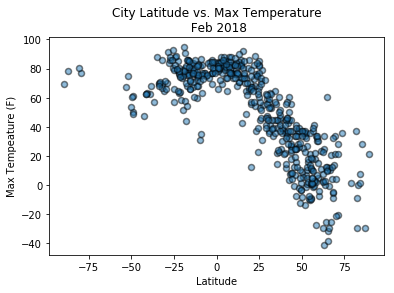

In [10]:
title = f'City Latitude vs. Max Temperature\n {last_date}'
x = df['latitude']
y = df['Max Temp']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Max Tempeature (F)')
plt.xlabel('Latitude')
plt.savefig('results/maxtemp.png')
plt.show()

# Latitude vs. Humidity Plot

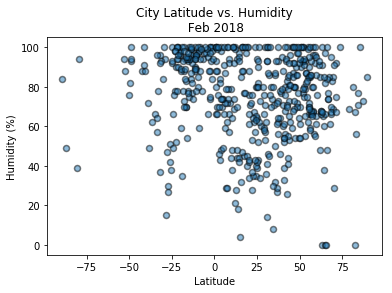

In [11]:
title = f'City Latitude vs. Humidity\n {last_date}'
y = df['Humidity']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('results/humidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

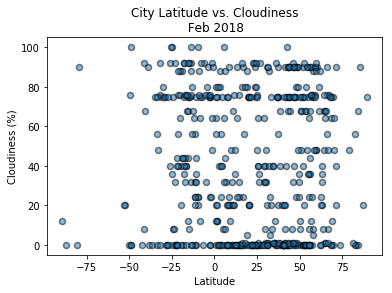

In [12]:
title = f'City Latitude vs. Cloudiness\n {last_date}'
y = df['Cloudiness']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('results/cloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

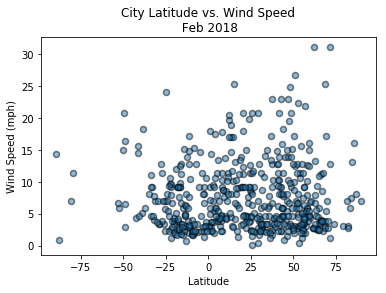

In [13]:
title = f'City Latitude vs. Wind Speed\n {last_date}'
y = df['Wind Speed']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('results/windspeed.png')
plt.show()